In [70]:
import csv
import pandas as pd
import seaborn as sns
sns.set_style('dark')
import matplotlib.pyplot as plt

In [52]:
# Read Data
data = pd.read_csv('data/Clean_Dataset.csv',index_col=0)

# Show first 5 Rows from data.
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [53]:
# Check data dimensions.
# We have 300153 records with 10 independent variables and one dependent variable (price).
data.shape

(300153, 11)

In [54]:
#Check if data attributes have any NA values
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [59]:
numericCols = data.select_dtypes(include=["float64","int64"]).columns     # Numerical data attributes --> duration and days left columns
categoricalCols = data.select_dtypes(include="object").columns  # Categorical daata attributes

# We can notice that almost all data attributes are categorical not numerical.
print(numericCols)
print(categoricalCols)


Index(['duration', 'days_left', 'price'], dtype='object')
Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class'],
      dtype='object')


In [56]:
# Check number of unique values in each categorical attribute to see if we can convert them into numerical.
# Only flight attribute has many different values 1561, but we can ignore it because the flight number can't affect the price.
for col in categoricalCols:
    print(f"{col}: {data[col].nunique()}")

# Remove flight column
data.drop('flight',axis=1,inplace=True)


airline: 6
flight: 1561
source_city: 6
departure_time: 6
stops: 3
arrival_time: 6
destination_city: 6
class: 2


In [60]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


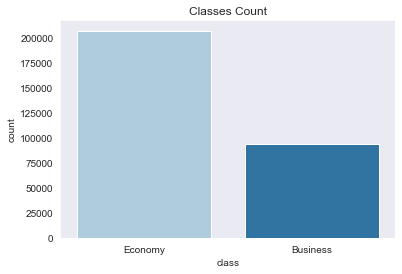

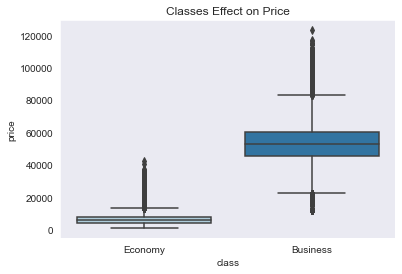

In [79]:
# See counts of each class in dataset.
plt.figure()
plt.title("Classes Count")
sns.countplot(x='class',data=data)
plt.show()
# We can see that the business class has more average price than economy class.
plt.figure()
plt.title("Classes Effect on Price")
sns.boxplot(x=data['class'], y=data['price'])
plt.show()

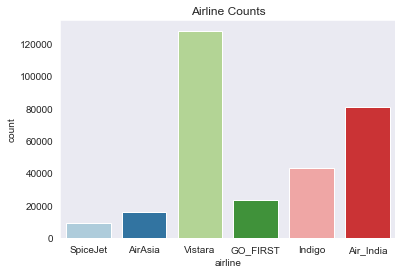

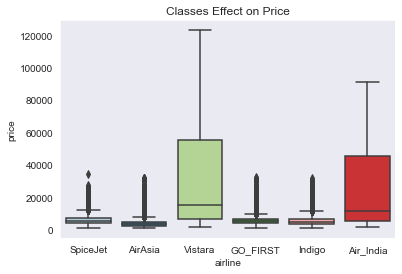

In [80]:
# See counts of each airline category in dataset.
plt.figure()
plt.title("Airline Counts")
sns.countplot(x='airline',data=data)
plt.show()
# We can see that Vistara and Air_India have highest price, but it can be because of the high count of those two airline.
plt.figure()
plt.title("Airline Effect on Price")
sns.boxplot(x=data['airline'], y=data['price'])
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

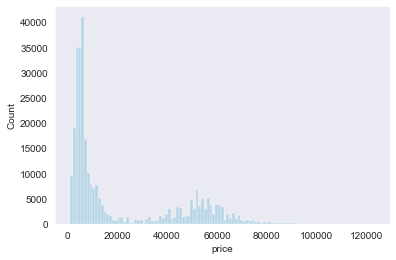

In [82]:
# See price values distribution in data we can notice that by increasing the price, the count of flights decreases.
sns.histplot(data, x="price")

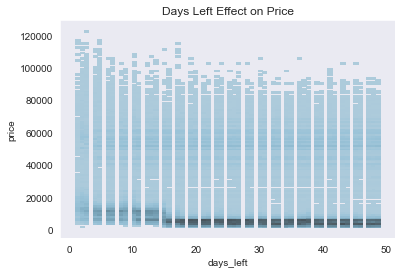

In [92]:
# After plotting the relation between days_left and price.
# we notice that when reserving a flight with low days_left it increases the price and when reserving a flight with high days_left it decreases the flight.
plt.figure()
plt.title("Days Left Effect on Price")
sns.histplot(x=data['days_left'], y=data['price'])
plt.show()

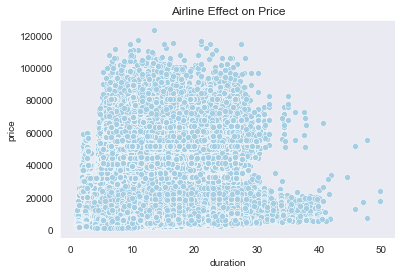

In [91]:
# After plotting the relation between duration and price.
# we notice that duration and price are not very correlated.
plt.title("Duration Effect on Price")
sns.scatterplot(x=data['duration'], y=data['price'])
plt.show()

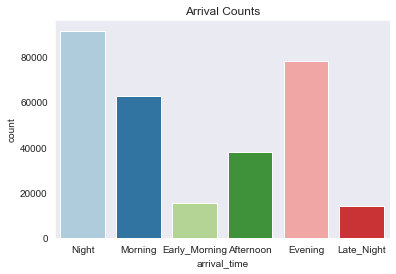

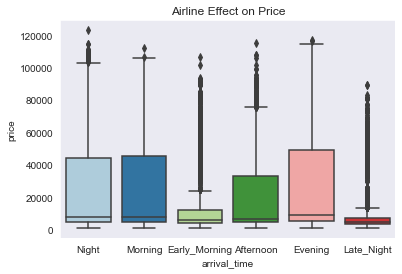

In [93]:
# See counts of each arrival time in dataset.
plt.figure()
plt.title("Arrival Counts")
sns.countplot(x='arrival_time',data=data)
plt.show()
# We can see that Late night and early morning have less price average.
plt.figure()
plt.title("Airline Effect on Price")
sns.boxplot(x=data['arrival_time'], y=data['price'])
plt.show()

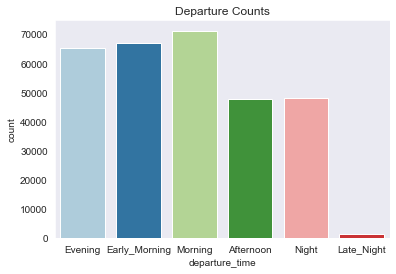

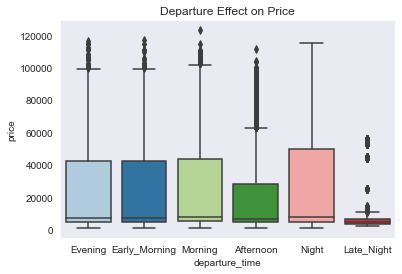

In [96]:
# See counts of each departure time in dataset.
plt.figure()
plt.title("Departure Counts")
sns.countplot(x='departure_time',data=data)
plt.show()
# We can see that Late night time has the least price and count of flights.
plt.figure()
plt.title("Departure Effect on Price")
sns.boxplot(x=data['departure_time'], y=data['price'])
plt.show()

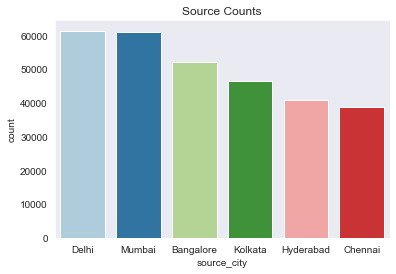

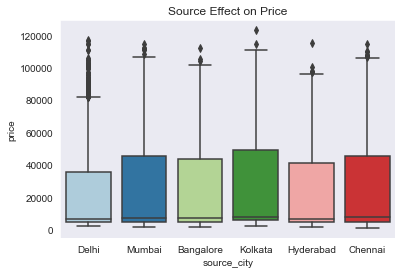

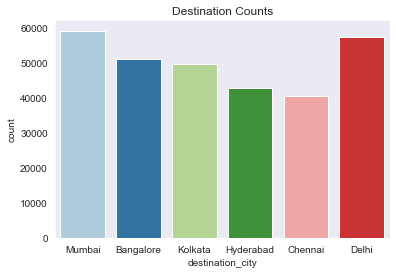

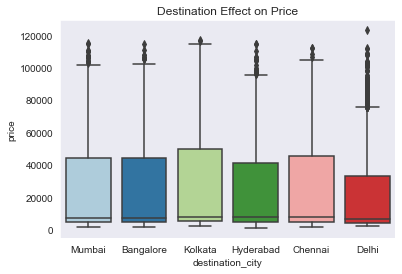

In [102]:
# See counts of each Source in dataset.
plt.figure()
plt.title("Source Counts")
sns.countplot(x='source_city',data=data)
plt.show()
# We can see that source city and price is not correlated.
plt.figure()
plt.title("Source Effect on Price")
sns.boxplot(x=data['source_city'], y=data['price'])
plt.show()
# See counts of each departure time in dataset.
plt.figure()
plt.title("Destination Counts")
sns.countplot(x='destination_city',data=data)
plt.show()
# We can see that destination city and price is not correlated.
plt.figure()
plt.title("Destination Effect on Price")
sns.boxplot(x=data['destination_city'], y=data['price'])
plt.show()

# But what about source Destination pairs ?!

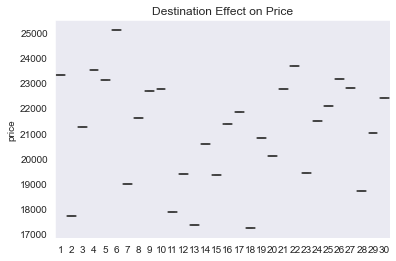

In [121]:
# Create Pairs of source and destination.
CombinedData = data.groupby(['source_city', 'destination_city'])['price'].mean()
CombinedData = CombinedData.reset_index()
x = list(range(1,len(CombinedData)+1))
# We can see that The source_destination pairs can tell somthing about price.
plt.figure()
plt.title("Destination Effect on Price")
sns.boxplot(x=x, y=CombinedData['price'])
plt.show()

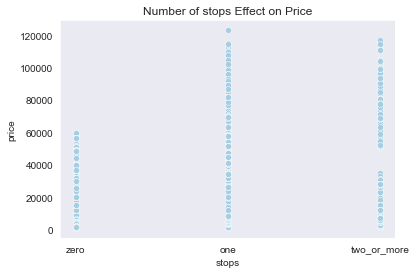

In [101]:
# After plotting the relation between stops and price.
# we notice that flights with zero stops has less price than others.
plt.title("Number of stops Effect on Price")
sns.scatterplot(x=data['stops'], y=data['price'])
plt.show()

In [57]:
file = open('data/weatherAUS.csv')
csvreader = csv.reader(file)
headers = next(csvreader)
data = []
for row in csvreader:
        data.append(row)
rows = len(data)
cols = len(data[0])
file.close()

FileNotFoundError: [Errno 2] No such file or directory: 'data/weatherAUS.csv'